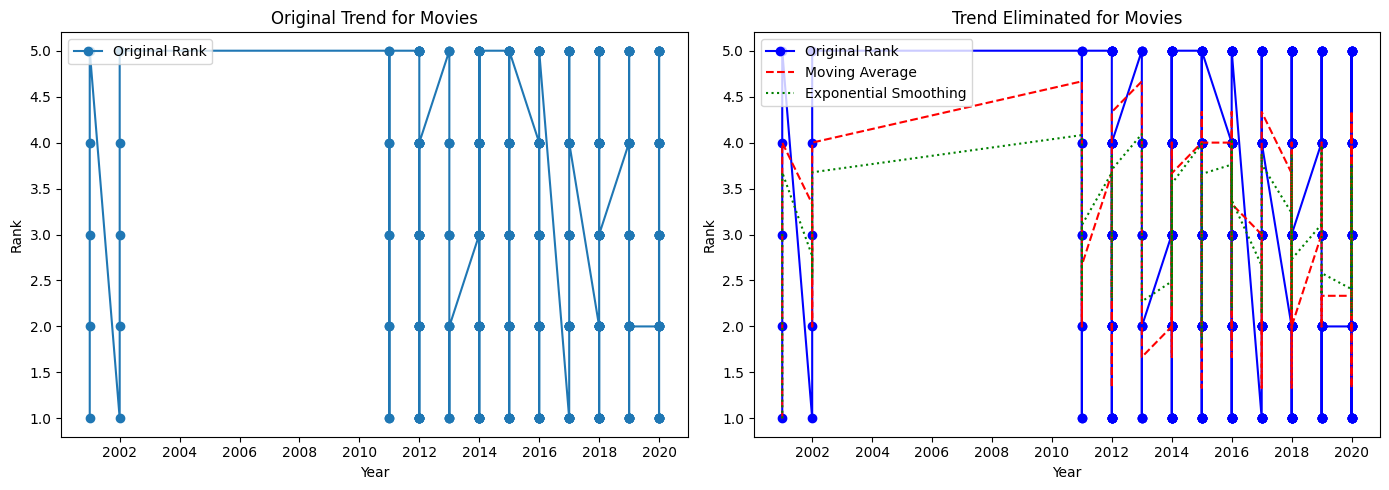

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (Replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("/content/trends.csv")

# Convert 'year' to datetime if it's not already
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Select the category to analyze (Example: "Technology")
category = "Movies"
df_category = df[df['category'] == category]

# Sort by year
df_category = df_category.sort_values('year')

# Moving Average (Window of 3)
df_category['Moving_Avg'] = df_category['rank'].rolling(window=3, min_periods=1).mean()

# Exponential Smoothing (Alpha = 0.3)
df_category['Exp_Smooth'] = df_category['rank'].ewm(alpha=0.3).mean()

# Plot Before and After Trend Elimination
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Original Data
axes[0].plot(df_category['year'], df_category['rank'], marker='o', linestyle='-', label="Original Rank")
axes[0].set_title(f"Original Trend for {category}")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Rank")
axes[0].legend()

# Plot After Trend Elimination
axes[1].plot(df_category['year'], df_category['rank'], 'bo-', label="Original Rank")
axes[1].plot(df_category['year'], df_category['Moving_Avg'], 'r--', label="Moving Average")
axes[1].plot(df_category['year'], df_category['Exp_Smooth'], 'g:', label="Exponential Smoothing")
axes[1].set_title(f"Trend Eliminated for {category}")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Rank")
axes[1].legend()

plt.tight_layout()
plt.show()
